# ActiveSurrogate: Automatic Surrogate Modeling with Active Learning

This notebook demonstrates how to use the `ActiveSurrogate` class to automatically build surrogate models using active learning. The system intelligently samples an input domain to minimize expensive function evaluations while building an accurate surrogate model.

## Key Features

- **Automatic Sampling**: Starts with Latin Hypercube sampling, then uses active learning to select informative points
- **Multiple Acquisition Functions**: Expected Improvement (EI), Upper Confidence Bound (UCB), Probability of Improvement (PI), Maximum Variance
- **Flexible Stopping Criteria**: Mean ratio, percentile-based, absolute threshold, convergence detection
- **Batch Support**: Can sample multiple points per iteration for parallel evaluation
- **History Tracking**: Records all metrics for analysis and visualization

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from pycse.pyroxy import ActiveSurrogate

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Suppress sklearn numerical warnings for cleaner output
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=RuntimeWarning, module="sklearn.gaussian_process._gpr")
warnings.filterwarnings(
    "ignore", category=ConvergenceWarning, module="sklearn.gaussian_process._gpr"
)
warnings.filterwarnings(
    "ignore", category=ConvergenceWarning, module="sklearn.gaussian_process.kernels"
)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.exceptions")

## Example 1: Basic Usage with a 1D Function

Let's start with a simple 1D function that has some interesting features (multiple local minima).

In [3]:
# Define a moderately complex test function
def expensive_function(X):
    """A function with multiple local minima."""
    x = X.flatten()
    return np.sin(x) + 0.5 * np.sin(3 * x) + 0.1 * x


# Define the domain
bounds = [(0, 10)]

# Create a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)

# Build the surrogate with active learning
print("Building surrogate with Expected Improvement acquisition...")
surrogate, history = ActiveSurrogate.build(
    func=expensive_function,
    bounds=bounds,
    model=model,
    acquisition="ei",
    stopping_criterion="mean_ratio",
    stopping_threshold=1.5,
    n_initial=5,
    max_iterations=20,
    verbose=True,
)

print(f"\nFinal surrogate built with {len(surrogate.xtrain)} samples")

Building surrogate with Expected Improvement acquisition...
Initialized with 5 LHS samples
Iteration 0/20
  Samples: 6
  Best acquisition: 0.0350
  Mean uncertainty: 0.7665
  Max uncertainty: 0.7741
Iteration 1/20
  Samples: 7
  Best acquisition: 0.1276
  Mean uncertainty: 0.6269
  Max uncertainty: 0.7771
Iteration 2/20
  Samples: 8
  Best acquisition: 0.2495
  Mean uncertainty: 0.5702
  Max uncertainty: 1.0393
Iteration 3/20
  Samples: 9
  Best acquisition: 0.0592
  Mean uncertainty: 0.4783
  Max uncertainty: 1.0382
Iteration 4/20
  Samples: 10
  Best acquisition: 0.0232
  Mean uncertainty: 0.3935
  Max uncertainty: 1.0216
Iteration 5/20
  Samples: 11
  Best acquisition: 0.0041
  Mean uncertainty: 0.2832
  Max uncertainty: 0.9453
Iteration 6/20
  Samples: 12
  Best acquisition: 0.0004
  Mean uncertainty: 0.1781
  Max uncertainty: 0.5283
Iteration 7/20
  Samples: 13
  Best acquisition: 0.0001
  Mean uncertainty: 0.1367
  Max uncertainty: 0.4887
Iteration 8/20
  Samples: 14
  Best acqui

/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Iteration 9/20
  Samples: 15
  Best acquisition: 0.0000
  Mean uncertainty: 0.0873
  Max uncertainty: 0.3368
Iteration 10/20
  Samples: 16
  Best acquisition: 0.0001
  Mean uncertainty: 0.0877
  Max uncertainty: 0.4058
Iteration 11/20
  Samples: 17
  Best acquisition: 0.0000
  Mean uncertainty: 0.0855
  Max uncertainty: 0.4065
Iteration 12/20
  Samples: 18
  Best acquisition: 0.0000
  Mean uncertainty: 0.0618
  Max uncertainty: 0.3663
Iteration 13/20
  Samples: 19
  Best acquisition: 0.0000
  Mean uncertainty: 0.0214
  Max uncertainty: 0.1206
Iteration 14/20
  Samples: 20
  Best acquisition: 0.0000
  Mean uncertainty: 0.0077
  Max uncertainty: 0.0357


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

Iteration 15/20
  Samples: 21
  Best acquisition: 0.0000
  Mean uncertainty: 0.0077
  Max uncertainty: 0.0460
Iteration 16/20
  Samples: 22
  Best acquisition: 0.0000
  Mean uncertainty: 0.0042
  Max uncertainty: 0.0227
Iteration 17/20
  Samples: 23
  Best acquisition: 0.0000
  Mean uncertainty: 0.0042
  Max uncertainty: 0.0226
Iteration 18/20
  Samples: 24
  Best acquisition: 0.0000
  Mean uncertainty: 0.0017
  Max uncertainty: 0.0098
Iteration 19/20
  Samples: 25
  Best acquisition: 0.0000
  Mean uncertainty: 0.0010
  Max uncertainty: 0.0061

Active learning complete: 25 samples

Final surrogate built with 25 samples


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

### Visualize the Results

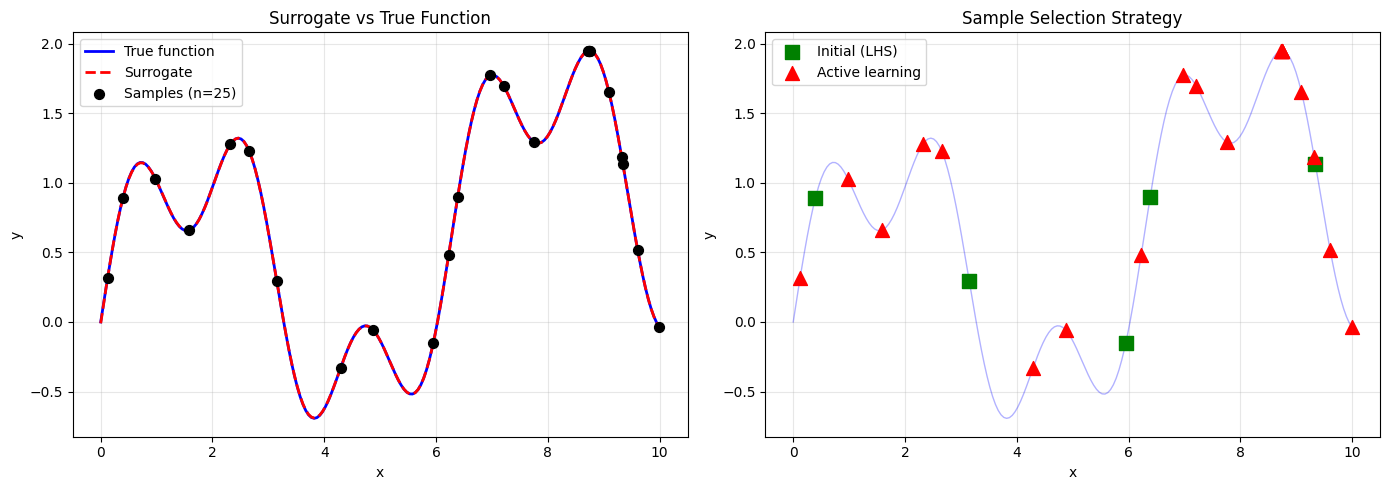


Surrogate Accuracy:
  RMSE: 0.0012
  Max Error: 0.0094


In [4]:
# Create test points
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_true = expensive_function(X_plot)
y_pred = surrogate(X_plot)

# Plot results
plt.figure(figsize=(14, 5))

# Left: Surrogate vs True Function
plt.subplot(1, 2, 1)
plt.plot(X_plot, y_true, "b-", label="True function", linewidth=2)
plt.plot(X_plot, y_pred, "r--", label="Surrogate", linewidth=2)
plt.scatter(
    surrogate.xtrain,
    surrogate.ytrain,
    c="black",
    s=50,
    label=f"Samples (n={len(surrogate.xtrain)})",
    zorder=5,
)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Surrogate vs True Function")
plt.grid(True, alpha=0.3)

# Right: Sample locations over iterations
plt.subplot(1, 2, 2)
# Mark initial samples
plt.scatter(
    surrogate.xtrain[:5],
    surrogate.ytrain[:5],
    c="green",
    s=100,
    marker="s",
    label="Initial (LHS)",
    zorder=5,
)
# Mark actively selected samples
if len(surrogate.xtrain) > 5:
    plt.scatter(
        surrogate.xtrain[5:],
        surrogate.ytrain[5:],
        c="red",
        s=100,
        marker="^",
        label="Active learning",
        zorder=5,
    )
plt.plot(X_plot, y_true, "b-", alpha=0.3, linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Sample Selection Strategy")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print accuracy metrics
rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
print("\nSurrogate Accuracy:")
print(f"  RMSE: {rmse:.4f}")
print(f"  Max Error: {np.max(np.abs(y_pred - y_true)):.4f}")

### Analyze the Training History

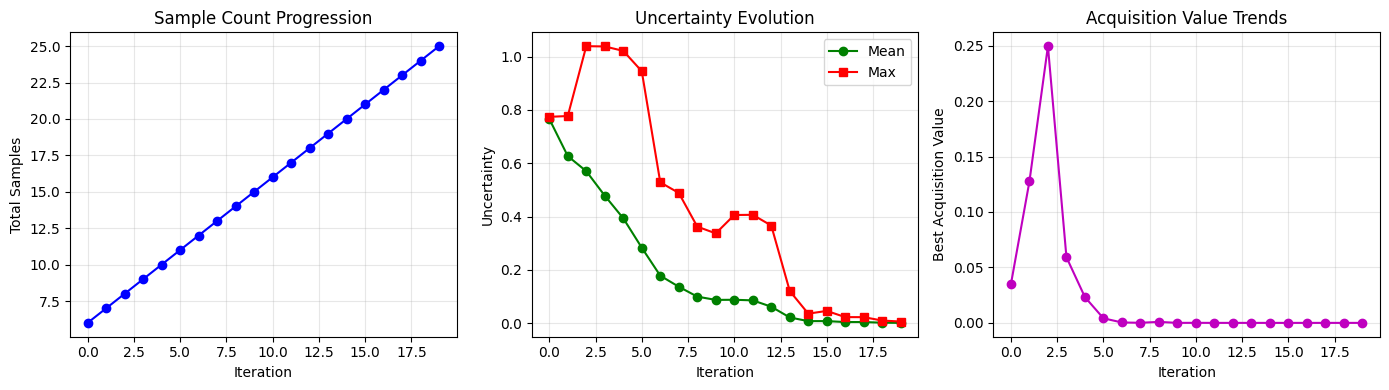

In [5]:
plt.figure(figsize=(14, 4))

# Sample progression
plt.subplot(1, 3, 1)
plt.plot(history["iterations"], history["n_samples"], "b-o")
plt.xlabel("Iteration")
plt.ylabel("Total Samples")
plt.title("Sample Count Progression")
plt.grid(True, alpha=0.3)

# Uncertainty evolution
plt.subplot(1, 3, 2)
plt.plot(history["iterations"], history["mean_uncertainty"], "g-o", label="Mean")
plt.plot(history["iterations"], history["max_uncertainty"], "r-s", label="Max")
plt.xlabel("Iteration")
plt.ylabel("Uncertainty")
plt.legend()
plt.title("Uncertainty Evolution")
plt.grid(True, alpha=0.3)

# Acquisition values
plt.subplot(1, 3, 3)
plt.plot(history["iterations"], history["acquisition_values"], "m-o")
plt.xlabel("Iteration")
plt.ylabel("Best Acquisition Value")
plt.title("Acquisition Value Trends")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Example 2: Comparing Different Acquisition Functions

Different acquisition functions have different exploration/exploitation trade-offs. Let's compare them:

In [6]:
acquisition_functions = ["ei", "ucb", "pi", "variance"]
acquisition_names = {
    "ei": "Expected Improvement",
    "ucb": "Upper Confidence Bound",
    "pi": "Probability of Improvement",
    "variance": "Maximum Variance",
}

results = {}

for acq in acquisition_functions:
    print(f"\nTesting {acquisition_names[acq]}...")

    # Create fresh model for each test
    kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)

    # Build surrogate
    surrogate, history = ActiveSurrogate.build(
        func=expensive_function,
        bounds=bounds,
        model=model,
        acquisition=acq,
        stopping_criterion="absolute",
        stopping_threshold=0.15,
        n_initial=5,
        max_iterations=15,
        verbose=False,
    )

    # Evaluate accuracy
    y_pred = surrogate(X_plot)
    rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))

    results[acq] = {
        "surrogate": surrogate,
        "history": history,
        "y_pred": y_pred,
        "rmse": rmse,
        "n_samples": len(surrogate.xtrain),
    }

    print(f"  Samples used: {results[acq]['n_samples']}")
    print(f"  RMSE: {rmse:.4f}")


Testing Expected Improvement...


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

  Samples used: 18
  RMSE: 0.0457

Testing Upper Confidence Bound...


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

  Samples used: 20
  RMSE: 0.4261

Testing Probability of Improvement...


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

  Samples used: 17
  RMSE: 0.0152

Testing Maximum Variance...
  Samples used: 16
  RMSE: 0.0143


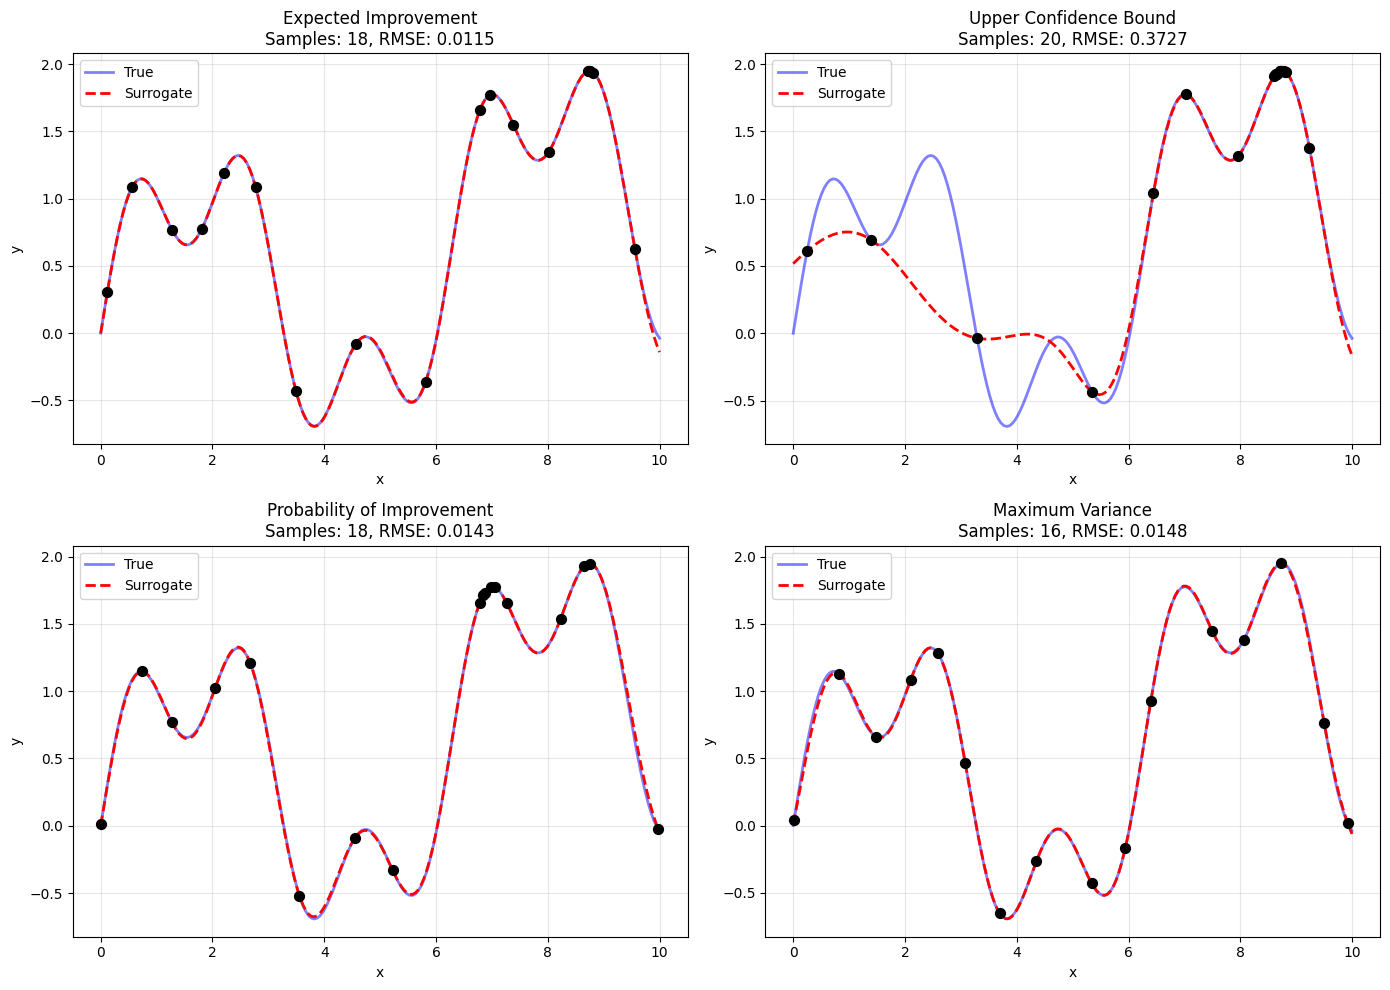


Summary Comparison:
Acquisition               Samples    RMSE      
---------------------------------------------
Expected Improvement      18         0.0115    
Upper Confidence Bound    20         0.3727    
Probability of Improvement 18         0.0143    
Maximum Variance          16         0.0148    


In [7]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, acq in enumerate(acquisition_functions):
    ax = axes[idx]

    # Plot true function and surrogate
    ax.plot(X_plot, y_true, "b-", label="True", linewidth=2, alpha=0.5)
    ax.plot(X_plot, results[acq]["y_pred"], "r--", label="Surrogate", linewidth=2)

    # Plot sample points
    surrogate = results[acq]["surrogate"]
    ax.scatter(surrogate.xtrain, surrogate.ytrain, c="black", s=50, zorder=5)

    ax.set_title(
        f"{acquisition_names[acq]}\n"
        f"Samples: {results[acq]['n_samples']}, RMSE: {results[acq]['rmse']:.4f}"
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary comparison
print("\nSummary Comparison:")
print(f"{'Acquisition':<25} {'Samples':<10} {'RMSE':<10}")
print("-" * 45)
for acq in acquisition_functions:
    print(
        f"{acquisition_names[acq]:<25} {results[acq]['n_samples']:<10} {results[acq]['rmse']:<10.4f}"
    )

## Example 3: 2D Function with Visualization

Let's demonstrate active learning on a 2D function.

In [8]:
# Define 2D test function
def func_2d(X):
    """2D test function with interesting features."""
    x1, x2 = X[:, 0], X[:, 1]
    return np.sin(x1) * np.cos(x2) + 0.1 * x1


# Define 2D domain
bounds_2d = [(0, 2 * np.pi), (0, 2 * np.pi)]

# Create model
kernel = C(1.0, (1e-3, 1e3)) * RBF([1.0, 1.0], (1e-2, 1e2))
model_2d = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)

# Build surrogate
print("Building 2D surrogate...")
surrogate_2d, history_2d = ActiveSurrogate.build(
    func=func_2d,
    bounds=bounds_2d,
    model=model_2d,
    acquisition="ei",
    stopping_criterion="mean_ratio",
    stopping_threshold=2.0,
    n_initial=10,
    max_iterations=20,
    verbose=True,
)

print(f"\n2D Surrogate built with {len(surrogate_2d.xtrain)} samples")

Building 2D surrogate...
Initialized with 10 LHS samples
Iteration 0/20
  Samples: 11
  Best acquisition: 0.0822
  Mean uncertainty: 0.2677
  Max uncertainty: 0.7006
Iteration 1/20
  Samples: 12
  Best acquisition: 0.0299
  Mean uncertainty: 0.2738
  Max uncertainty: 0.6439
Iteration 2/20
  Samples: 13
  Best acquisition: 0.0235
  Mean uncertainty: 0.2663
  Max uncertainty: 0.6083
Iteration 3/20
  Samples: 14
  Best acquisition: 0.0280
  Mean uncertainty: 0.2303
  Max uncertainty: 0.6157
Iteration 4/20
  Samples: 15
  Best acquisition: 0.0108
  Mean uncertainty: 0.2178
  Max uncertainty: 0.6246
Iteration 5/20
  Samples: 16
  Best acquisition: 0.0016
  Mean uncertainty: 0.2163
  Max uncertainty: 0.5820
Iteration 6/20
  Samples: 17
  Best acquisition: 0.0010
  Mean uncertainty: 0.2081
  Max uncertainty: 0.5793
Iteration 7/20
  Samples: 18
  Best acquisition: 0.0036
  Mean uncertainty: 0.1687
  Max uncertainty: 0.5549
Iteration 8/20
  Samples: 19
  Best acquisition: 0.0009
  Mean uncertai

/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: invalid value encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_proc

Iteration 10/20
  Samples: 21
  Best acquisition: 0.0006
  Mean uncertainty: 0.1357
  Max uncertainty: 0.4353
Iteration 11/20
  Samples: 22
  Best acquisition: 0.0001
  Mean uncertainty: 0.1232
  Max uncertainty: 0.3939
Iteration 12/20
  Samples: 23
  Best acquisition: 0.0000
  Mean uncertainty: 0.1299
  Max uncertainty: 0.4222
Iteration 13/20
  Samples: 24
  Best acquisition: 0.0000
  Mean uncertainty: 0.1107
  Max uncertainty: 0.3599
Iteration 14/20
  Samples: 25
  Best acquisition: 0.0028
  Mean uncertainty: 0.0911
  Max uncertainty: 0.2985
Iteration 15/20
  Samples: 26
  Best acquisition: 0.0000
  Mean uncertainty: 0.0869
  Max uncertainty: 0.2980
Iteration 16/20
  Samples: 27
  Best acquisition: 0.0000
  Mean uncertainty: 0.0745
  Max uncertainty: 0.2832
Iteration 17/20
  Samples: 28
  Best acquisition: 0.0000
  Mean uncertainty: 0.0671
  Max uncertainty: 0.2192
Iteration 18/20
  Samples: 29
  Best acquisition: 0.0000
  Mean uncertainty: 0.0610
  Max uncertainty: 0.1703


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: invalid value encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_proc

Iteration 19/20
  Samples: 30
  Best acquisition: 0.0000
  Mean uncertainty: 0.0479
  Max uncertainty: 0.1494

Active learning complete: 30 samples

2D Surrogate built with 30 samples


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: invalid value encountered in matmul
  y_mean = K_trans @ self.alpha_


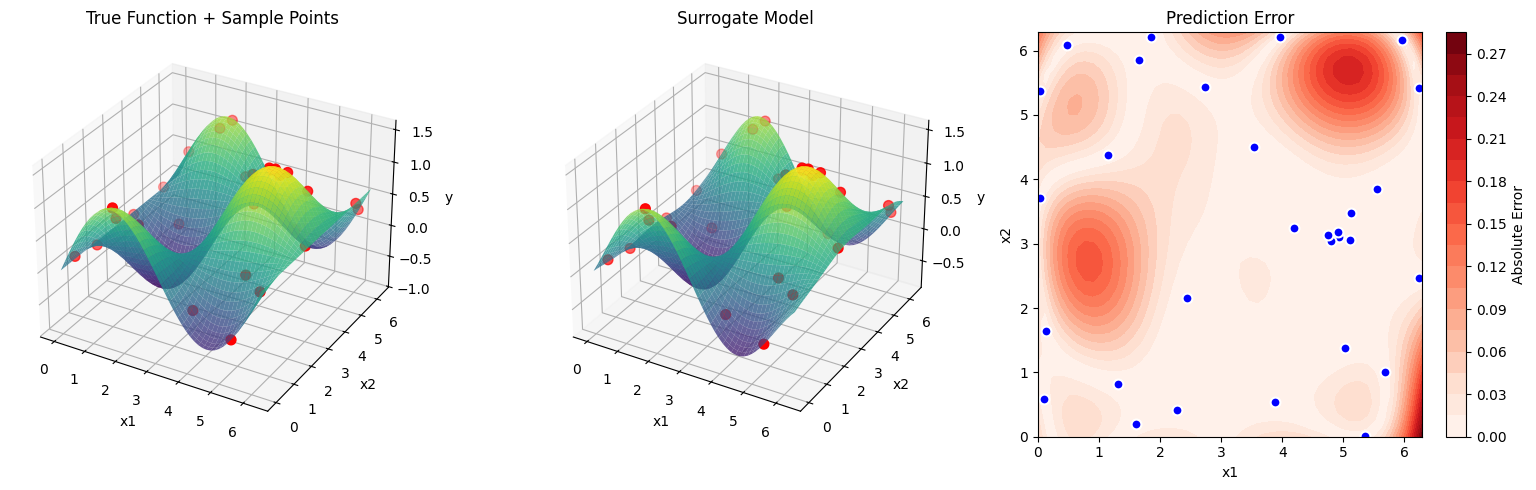


2D Surrogate Statistics:
  Mean Absolute Error: 0.0352
  Max Absolute Error: 0.2777
  RMSE: 0.0567


In [9]:
# Create meshgrid for visualization
x1_grid = np.linspace(0, 2 * np.pi, 50)
x2_grid = np.linspace(0, 2 * np.pi, 50)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# Evaluate true function and surrogate
y_true_2d = func_2d(X_grid).reshape(X1.shape)
y_pred_2d = surrogate_2d(X_grid).reshape(X1.shape)

# Visualize
fig = plt.figure(figsize=(16, 5))

# True function
ax1 = fig.add_subplot(131, projection="3d")
surf1 = ax1.plot_surface(X1, X2, y_true_2d, cmap="viridis", alpha=0.8)
ax1.scatter(
    surrogate_2d.xtrain[:, 0],
    surrogate_2d.xtrain[:, 1],
    surrogate_2d.ytrain,
    c="red",
    s=50,
    marker="o",
)
ax1.set_title("True Function + Sample Points")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("y")

# Surrogate
ax2 = fig.add_subplot(132, projection="3d")
surf2 = ax2.plot_surface(X1, X2, y_pred_2d, cmap="viridis", alpha=0.8)
ax2.scatter(
    surrogate_2d.xtrain[:, 0],
    surrogate_2d.xtrain[:, 1],
    surrogate_2d.ytrain,
    c="red",
    s=50,
    marker="o",
)
ax2.set_title("Surrogate Model")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("y")

# Error
ax3 = fig.add_subplot(133)
error = np.abs(y_true_2d - y_pred_2d)
contour = ax3.contourf(X1, X2, error, levels=20, cmap="Reds")
ax3.scatter(
    surrogate_2d.xtrain[:, 0],
    surrogate_2d.xtrain[:, 1],
    c="blue",
    s=50,
    marker="o",
    edgecolors="white",
    linewidths=1.5,
)
plt.colorbar(contour, ax=ax3, label="Absolute Error")
ax3.set_title("Prediction Error")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")

plt.tight_layout()
plt.show()

print("\n2D Surrogate Statistics:")
print(f"  Mean Absolute Error: {np.mean(error):.4f}")
print(f"  Max Absolute Error: {np.max(error):.4f}")
print(f"  RMSE: {np.sqrt(np.mean(error**2)):.4f}")

## Example 4: Using Batch Mode for Parallel Evaluation

When your function can be evaluated in parallel, batch mode samples multiple points per iteration.

In [10]:
# Build surrogate with batch sampling
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model_batch = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)

print("Building surrogate with batch_size=3...")
surrogate_batch, history_batch = ActiveSurrogate.build(
    func=expensive_function,
    bounds=bounds,
    model=model_batch,
    acquisition="ucb",
    batch_size=3,  # Sample 3 points per iteration
    stopping_criterion="absolute",
    stopping_threshold=0.15,
    n_initial=5,
    max_iterations=10,
    verbose=True,
)

print(f"\nBatch surrogate built with {len(surrogate_batch.xtrain)} samples")
print(f"Iterations run: {len(history_batch['iterations'])}")
print(
    f"Average samples per iteration: {(len(surrogate_batch.xtrain) - 5) / len(history_batch['iterations']):.1f}"
)

Building surrogate with batch_size=3...
Initialized with 5 LHS samples
Iteration 0/10
  Samples: 8
  Best acquisition: 2.8534
  Mean uncertainty: 0.2200
  Max uncertainty: 0.7337
Iteration 1/10
  Samples: 11
  Best acquisition: 2.4462
  Mean uncertainty: 0.4016
  Max uncertainty: 0.9864
Iteration 2/10
  Samples: 14
  Best acquisition: 2.1724
  Mean uncertainty: 0.2392
  Max uncertainty: 0.8492
Iteration 3/10
  Samples: 17
  Best acquisition: 1.9267
  Mean uncertainty: 0.1664
  Max uncertainty: 0.7813
Iteration 4/10
  Samples: 20
  Best acquisition: 1.9491
  Mean uncertainty: 0.1281
  Max uncertainty: 0.7047
Iteration 5/10
  Samples: 23
  Best acquisition: 1.9491
  Mean uncertainty: 0.1251
  Max uncertainty: 0.6986
Iteration 6/10
  Samples: 26
  Best acquisition: 1.9410
  Mean uncertainty: 0.1225
  Max uncertainty: 0.6955


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: invalid value encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_proc

Iteration 7/10
  Samples: 29
  Best acquisition: 1.9337
  Mean uncertainty: 0.1225
  Max uncertainty: 0.6906
Iteration 8/10
  Samples: 32
  Best acquisition: 1.9245
  Mean uncertainty: 0.1233
  Max uncertainty: 0.6931
Iteration 9/10
  Samples: 35
  Best acquisition: 1.9467
  Mean uncertainty: 0.1253
  Max uncertainty: 0.6918

Active learning complete: 35 samples

Batch surrogate built with 35 samples
Iterations run: 10
Average samples per iteration: 3.0


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: invalid value encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_proc

## Example 5: Custom Callback for Monitoring

You can provide a callback function to monitor or log the training process.

Building surrogate with custom callback...
  [Callback] Iteration 0: Mean uncertainty = 1.2099
  [Callback] Iteration 5: Mean uncertainty = 0.2520


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in 

  [Callback] Iteration 10: Mean uncertainty = 0.0665
  [Callback] Iteration 15: Mean uncertainty = 0.0011


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: invalid value encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:44

  [Callback] Iteration 20: Mean uncertainty = 0.0001

Callback tracked 25 iterations


/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: invalid value encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: divide by zero encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:441: RuntimeWarning: overflow encountered in matmul
  y_mean = K_trans @ self.alpha_
/Users/jkitchin/Dropbox/uv/.venv/lib/python3.12/site-packages/sklearn/gaussian_proc

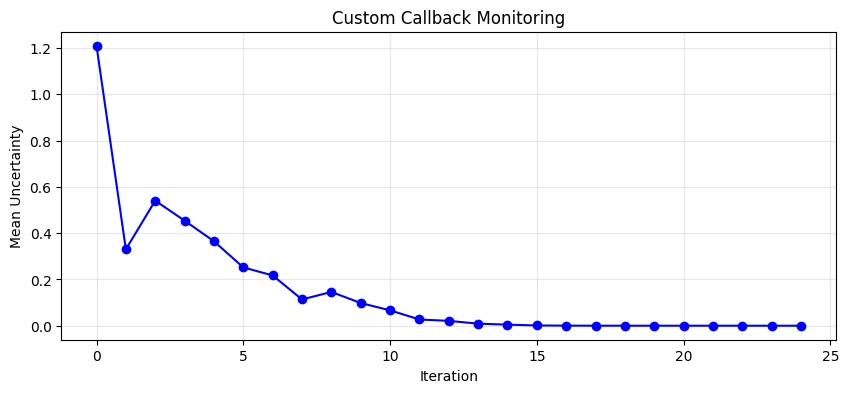

In [11]:
# Define a custom callback
callback_data = {"iterations": [], "uncertainties": []}


def my_callback(iteration, history):
    """Custom callback to track specific metrics."""
    callback_data["iterations"].append(iteration)
    callback_data["uncertainties"].append(history["mean_uncertainty"][-1])

    if iteration % 5 == 0:
        print(
            f"  [Callback] Iteration {iteration}: Mean uncertainty = {history['mean_uncertainty'][-1]:.4f}"
        )


# Build surrogate with callback
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model_cb = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)

print("Building surrogate with custom callback...")
surrogate_cb, history_cb = ActiveSurrogate.build(
    func=expensive_function,
    bounds=bounds,
    model=model_cb,
    acquisition="ei",
    stopping_criterion="convergence",
    stopping_threshold=0.05,
    n_initial=5,
    max_iterations=25,
    callback=my_callback,
    verbose=False,
)

print(f"\nCallback tracked {len(callback_data['iterations'])} iterations")

# Plot callback data
plt.figure(figsize=(10, 4))
plt.plot(callback_data["iterations"], callback_data["uncertainties"], "b-o")
plt.xlabel("Iteration")
plt.ylabel("Mean Uncertainty")
plt.title("Custom Callback Monitoring")
plt.grid(True, alpha=0.3)
plt.show()

## Summary

This notebook demonstrated:

1. **Basic Usage**: Building a surrogate with default settings
2. **Acquisition Functions**: Comparing EI, UCB, PI, and variance-based strategies
3. **2D Functions**: Extending to multi-dimensional problems
4. **Batch Mode**: Sampling multiple points per iteration for parallel evaluation
5. **Custom Callbacks**: Monitoring and logging during training

### Key Takeaways

- **Expected Improvement (EI)** balances exploration and exploitation well for optimization
- **Maximum Variance** is best for pure space-filling and coverage
- **Batch mode** with hallucination provides diverse samples for parallel evaluation
- **Stopping criteria** can be tuned based on your accuracy requirements
- The returned surrogate is a standard `_Surrogate` object that can be used like any other pyroxy surrogate

### When to Use ActiveSurrogate

- Your function is expensive to evaluate (simulations, experiments, etc.)
- You want to minimize the number of function evaluations
- You need a surrogate model for optimization or analysis
- You want automatic, intelligent sampling rather than manual grid selection